In [120]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime
import seaborn as sns

In [128]:
DATA_FOLDER = 'data'
FIG_FOLDER = 'fig'

os.makedirs(FIG_FOLDER, exist_ok=True)

data_file = os.path.join(DATA_FOLDER, 'clean_stageinfamilycycle.csv')
df = pd.read_csv(data_file)

print(df.head())

                                               stage gender      years  \
0  Aged under 45, single, no children, living wit...    Men  1987-1988   
1  Aged under 45, single, no children, living wit...    Men  1999-2000   
2  Aged under 45, single, no children, living wit...    Men  2009-2010   
3  Aged under 45, single, no children, living wit...  Women  1987-1988   
4  Aged under 45, single, no children, living wit...  Women  1999-2000   

   Gainful employment  Travel to and from work  Housekeeping  \
0                22.0                     10.0          18.0   
1                16.0                      6.0          23.0   
2                56.0                      4.0          18.0   
3                 1.0                      7.0          48.0   
4                27.0                      4.0          39.0   

   Maintenance work  Other domestic work  Childcare  Shopping and services  \
0              24.0                 10.0        1.0                   15.0   
1             

In [129]:
print(df.columns)

Index(['stage', 'gender', 'years', 'Gainful employment',
       'Travel to and from work', 'Housekeeping', 'Maintenance work',
       'Other domestic work', 'Childcare', 'Shopping and services',
       'Travel related to domestic work', 'Sleep', 'Meals',
       'Washing and dressing', 'School or university',
       'Travel related to study', 'Free time study (incl. related travel)',
       'Participatory activity', 'Sports and outdoor activities',
       'Entertainment and culture', 'Reading', 'Listening to radio',
       'Watching television', 'Socialising with family',
       'Socialising with friends', 'Hobbies', 'Other free time',
       'Travel related to free time'],
      dtype='object')


In [130]:
print(df.index)

RangeIndex(start=0, stop=48, step=1)


In [131]:
genders = df.gender.unique()
print(genders)

['Men' 'Women']


In [132]:
years = df.years.unique()
print(years)

['1987-1988' '1999-2000' '2009-2010']


In [133]:
stages = df.stage.unique()
print(stages)

['Aged under 45, single, no children, living with parents'
 'Aged under 45, single, no children, living elsewhere' 'Single parent'
 'Aged under 45, married or cohabiting, no children'
 'Married or cohabiting, youngest child aged 0-6'
 'Married or cohabiting, youngest child aged 7-17'
 'Aged over 45, married or cohibiting, no children'
 'Aged over 45, single, no children']


In [134]:
activities = [c for c in df.columns if c not in ("gender", "stage", "years")]
print(activities)

['Gainful employment', 'Travel to and from work', 'Housekeeping', 'Maintenance work', 'Other domestic work', 'Childcare', 'Shopping and services', 'Travel related to domestic work', 'Sleep', 'Meals', 'Washing and dressing', 'School or university', 'Travel related to study', 'Free time study (incl. related travel)', 'Participatory activity', 'Sports and outdoor activities', 'Entertainment and culture', 'Reading', 'Listening to radio', 'Watching television', 'Socialising with family', 'Socialising with friends', 'Hobbies', 'Other free time', 'Travel related to free time']


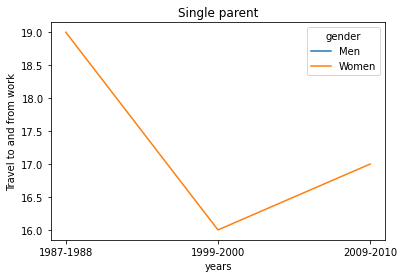

In [135]:
part_df = df[df["stage"] == "Single parent"]
sns.lineplot(data=part_df, x="years", y="Travel to and from work", hue="gender")
plt.title("Single parent")
plt.show()

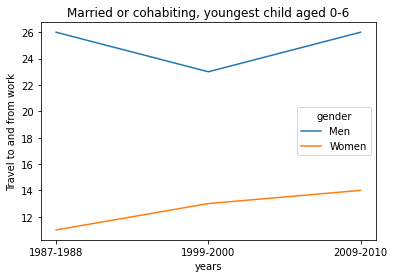

In [136]:
st = "Married or cohabiting, youngest child aged 0-6"
part_df = df[df["stage"] == st]
sns.lineplot(data=part_df, x="years", y="Travel to and from work", hue="gender")
plt.title(st)
plt.show()

In [137]:
st_list = df["stage"].unique()
print(st_list)

['Aged under 45, single, no children, living with parents'
 'Aged under 45, single, no children, living elsewhere' 'Single parent'
 'Aged under 45, married or cohabiting, no children'
 'Married or cohabiting, youngest child aged 0-6'
 'Married or cohabiting, youngest child aged 7-17'
 'Aged over 45, married or cohibiting, no children'
 'Aged over 45, single, no children']


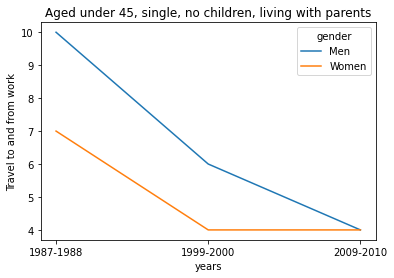

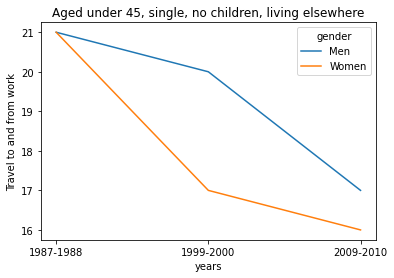

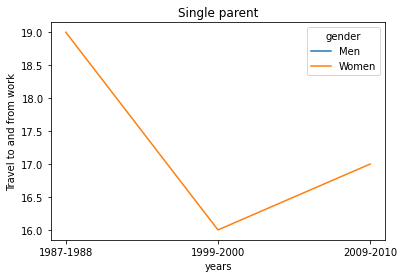

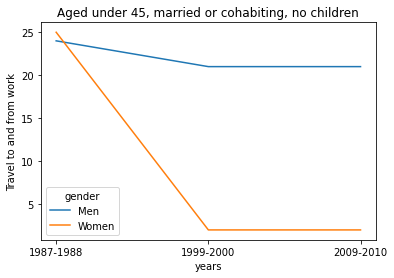

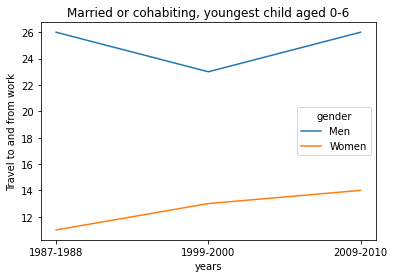

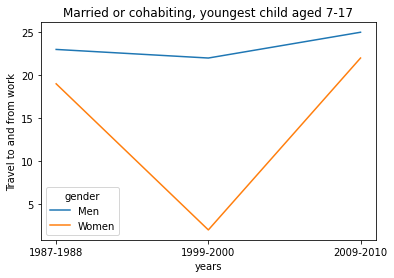

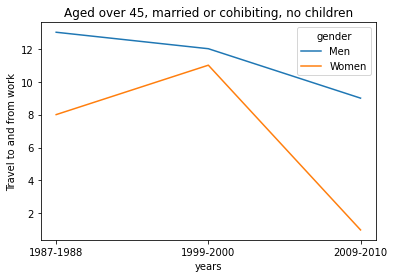

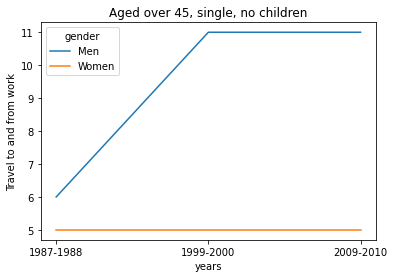

In [138]:
for st in st_list:
    part_df = df[df["stage"] == st]
    sns.lineplot(data=part_df, x="years", y="Travel to and from work", hue="gender")
    plt.title(st)
    plt.show()

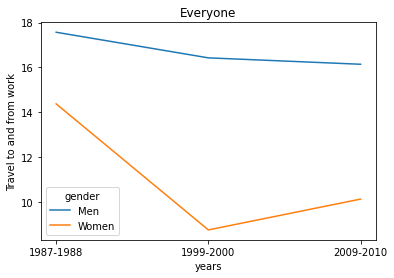

In [139]:
sns.lineplot(data=df, x="years", y="Travel to and from work", hue="gender", ci=None)
plt.title("Everyone")
plt.show()

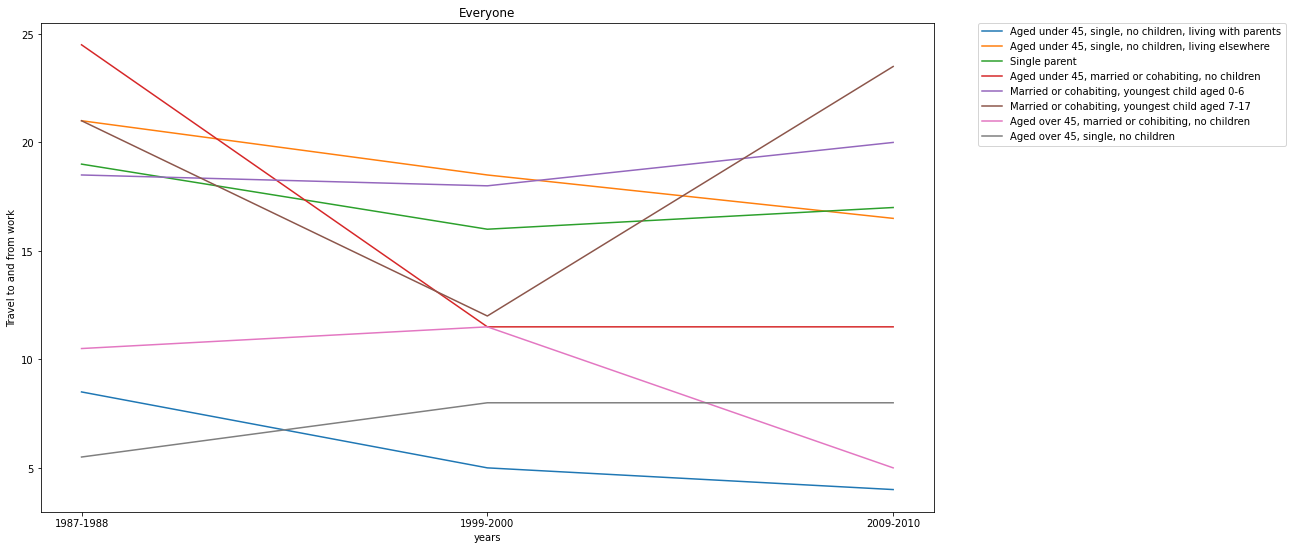

In [140]:
df_nonan = df.dropna()
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(data=df_nonan, x="years", y="Travel to and from work", hue="stage", ax=ax, ci=None)
plt.title("Everyone")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [141]:
print(df.stage.unique())

['Aged under 45, single, no children, living with parents'
 'Aged under 45, single, no children, living elsewhere' 'Single parent'
 'Aged under 45, married or cohabiting, no children'
 'Married or cohabiting, youngest child aged 0-6'
 'Married or cohabiting, youngest child aged 7-17'
 'Aged over 45, married or cohibiting, no children'
 'Aged over 45, single, no children']


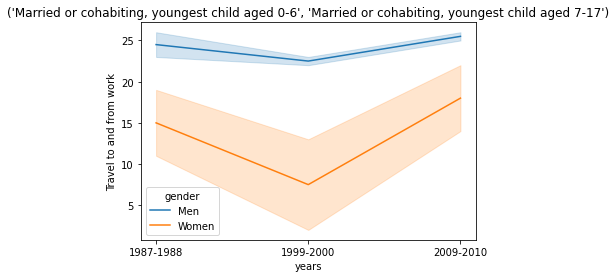

In [142]:
mylist = "Married or cohabiting, youngest child aged 0-6", 'Married or cohabiting, youngest child aged 7-17'
part_df = df[df["stage"].isin(mylist)]
sns.lineplot(data=part_df, x="years", y="Travel to and from work", hue="gender")
plt.title(mylist)
plt.show()

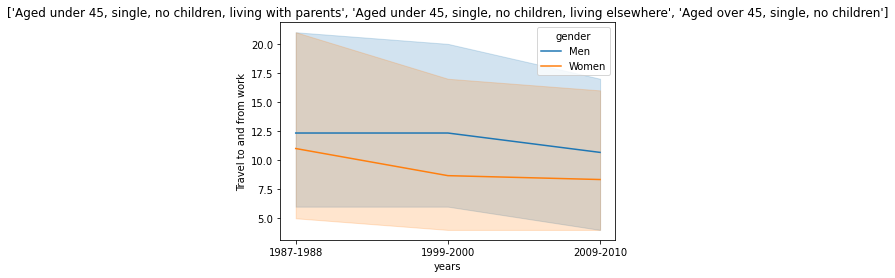

In [143]:
mylist = [n for n in df.stage.unique() if "single" in n]
part_df = df[df["stage"].isin(mylist)]
sns.lineplot(data=part_df, x="years", y="Travel to and from work", hue="gender")
plt.title(mylist)
plt.show()

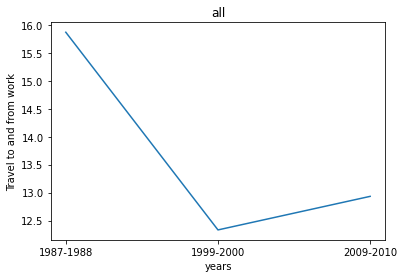

In [144]:
sns.lineplot(data=df, x="years", y="Travel to and from work")
plt.title("all")
plt.show()

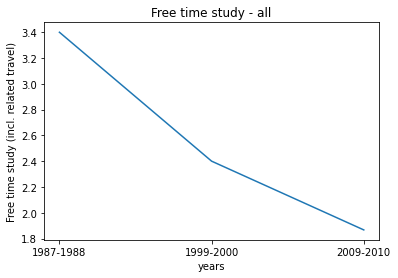

In [146]:
sns.lineplot(data=df, x="years", y="Free time study (incl. related travel)")
plt.title("Free time study - all")
plt.show()

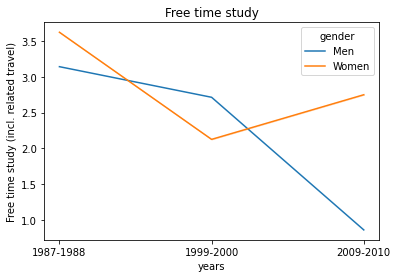

In [148]:
sns.lineplot(data=df, x="years", y="Free time study (incl. related travel)", hue="gender", ci=False)
plt.title("Free time study")
plt.show()

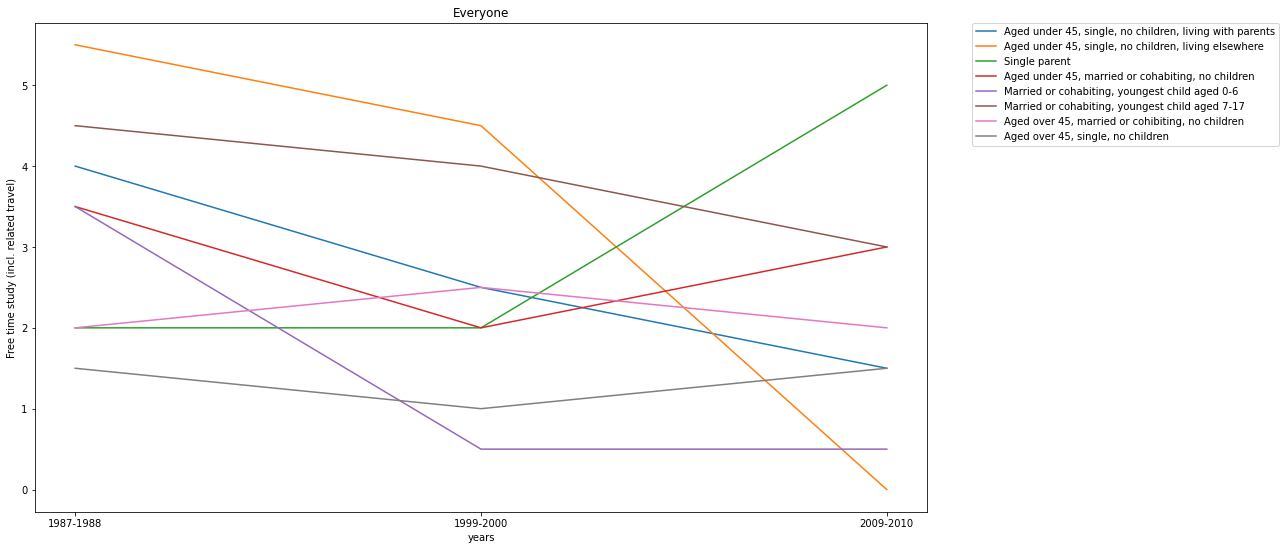

In [150]:
df_nonan = df.dropna()
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(data=df_nonan, x="years", y="Free time study (incl. related travel)", hue="stage", ax=ax, ci=None)
plt.title("Everyone")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

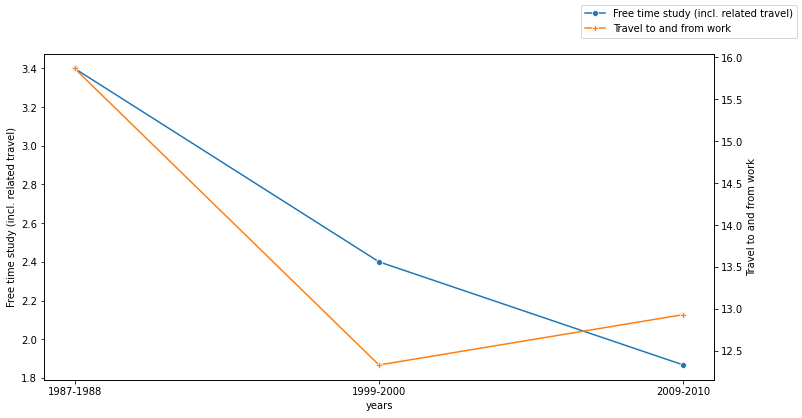

In [151]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create a line for the cheese consumption
sns.lineplot(x="years", y="Free time study (incl. related travel)", data=df, marker="o", color="C0",
             label="Free time study (incl. related travel)", ax=ax, legend=False)

# Create a duplicate of the axis for having a second y-axis
ax = ax.twinx()

# Create a line for the death number
sns.lineplot(x="years", y="Travel to and from work", data=df, marker="P", color="C1",
             label="Travel to and from work", ax=ax, legend=False)

# Make the legend 
ax.figure.legend()

plt.show()

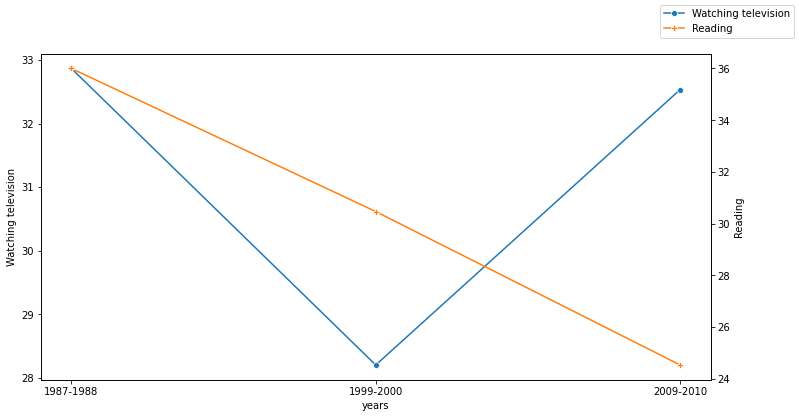

In [154]:
activities = ['Gainful employment', 'Travel to and from work', 'Housekeeping', 'Maintenance work', 
 'Other domestic work', 'Childcare', 'Shopping and services', 
 'Travel related to domestic work', 'Sleep', 'Meals', 'Washing and dressing', 
 'School or university', 'Travel related to study', 'Free time study (incl. related travel)', 
 'Participatory activity', 'Sports and outdoor activities', 'Entertainment and culture', 
 'Reading', 'Listening to radio', 'Watching television', 'Socialising with family', 
 'Socialising with friends', 'Hobbies', 'Other free time', 'Travel related to free time']

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# for act in ("Reading", "Watching television", ):
# Create a line for the cheese consumption

act_to_plot = "Watching television", "Reading"

sns.lineplot(x="years", y=act_to_plot[0], data=df, marker="o", color="C0", ax=ax, 
             label=act_to_plot[0],
             legend=False)

# Create a duplicate of the axis for having a second y-axis
ax = ax.twinx()

# Create a line for the death number
sns.lineplot(x="years", y=act_to_plot[1], data=df, marker="P", color="C1",
             label=act_to_plot[1],
             ax=ax, legend=False)

# Make the legend 
ax.figure.legend()

plt.show()

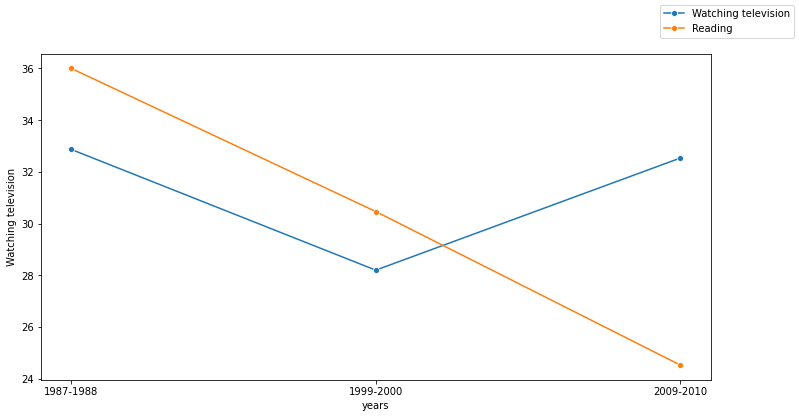

In [156]:
['Gainful employment', 'Travel to and from work', 'Housekeeping', 'Maintenance work', 
 'Other domestic work', 'Childcare', 'Shopping and services', 
 'Travel related to domestic work', 'Sleep', 'Meals', 'Washing and dressing', 
 'School or university', 'Travel related to study', 'Free time study (incl. related travel)', 
 'Participatory activity', 'Sports and outdoor activities', 'Entertainment and culture', 
 'Reading', 'Listening to radio', 'Watching television', 'Socialising with family', 
 'Socialising with friends', 'Hobbies', 'Other free time', 'Travel related to free time']

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# for act in ("Reading", "Watching television", ):
# Create a line for the cheese consumption

act_to_plot = "Watching television", "Reading"

for act in act_to_plot:

    sns.lineplot(x="years", y=act, data=df, marker="o", ax=ax, 
                 label=act,
                 legend=False)

# Make the legend 
ax.figure.legend()

plt.show()

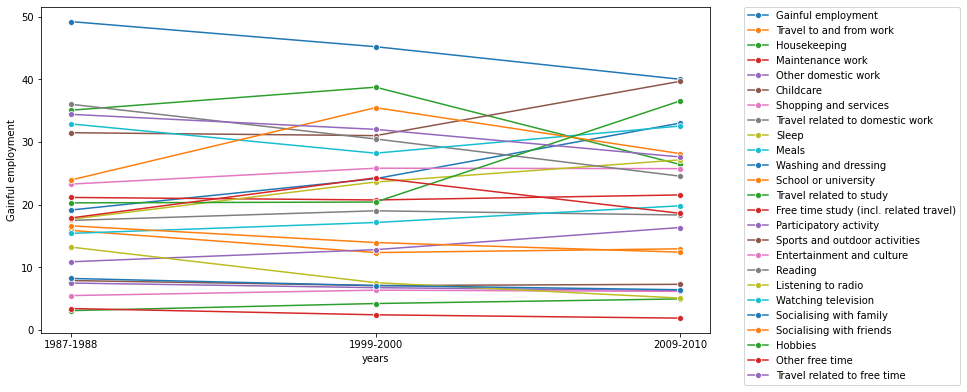

In [159]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# for act in ("Reading", "Watching television", ):
# Create a line for the cheese consumption

act_to_plot = ['Gainful employment', 'Travel to and from work', 'Housekeeping', 'Maintenance work', 
 'Other domestic work', 'Childcare', 'Shopping and services', 
 'Travel related to domestic work', 'Sleep', 'Meals', 'Washing and dressing', 
 'School or university', 'Travel related to study', 'Free time study (incl. related travel)', 
 'Participatory activity', 'Sports and outdoor activities', 'Entertainment and culture', 
 'Reading', 'Listening to radio', 'Watching television', 'Socialising with family', 
 'Socialising with friends', 'Hobbies', 'Other free time', 'Travel related to free time']

for act in act_to_plot:

    sns.lineplot(x="years", y=act, data=df, marker="o", ax=ax, label=act)

# Make the legend 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

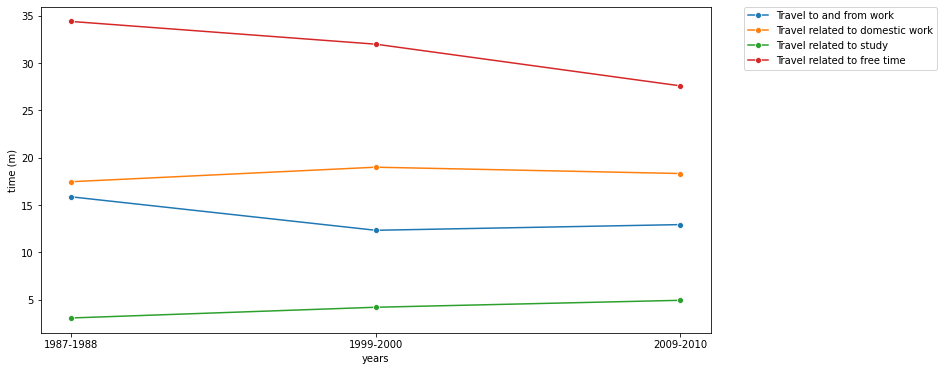

In [164]:
activities = ['Gainful employment', 'Travel to and from work', 'Housekeeping', 'Maintenance work', 
 'Other domestic work', 'Childcare', 'Shopping and services', 
 'Travel related to domestic work', 'Sleep', 'Meals', 'Washing and dressing', 
 'School or university', 'Travel related to study', 'Free time study (incl. related travel)', 
 'Participatory activity', 'Sports and outdoor activities', 'Entertainment and culture', 
 'Reading', 'Listening to radio', 'Watching television', 'Socialising with family', 
 'Socialising with friends', 'Hobbies', 'Other free time', 'Travel related to free time']

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# for act in ("Reading", "Watching television", ):
# Create a line for the cheese consumption

act_to_plot = [act for act in activities if "Travel" in act]

for act in act_to_plot:

    sns.lineplot(x="years", y=act, data=df, marker="o", ax=ax, label=act)

# Make the legend 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.set_ylabel("time (m)")

plt.show()

Gainful employment                       mean 80: 19.13 mean2010s: 33.00
Travel to and from work                  mean 80: 15.87 mean2010s: 12.93
Housekeeping                             mean 80: 35.07 mean2010s: 26.40
Maintenance work                         mean 80: 21.13 mean2010s: 21.53
Other domestic work                      mean 80: 10.87 mean2010s: 16.33
Childcare                                mean 80: 7.87 mean2010s: 7.27
Shopping and services                    mean 80: 23.27 mean2010s: 25.73
Travel related to domestic work          mean 80: 17.47 mean2010s: 18.33
Sleep                                    mean 80: 17.67 mean2010s: 27.13
Meals                                    mean 80: 15.40 mean2010s: 19.80
Washing and dressing                     mean 80: 49.20 mean2010s: 40.00
School or university                     mean 80: 16.60 mean2010s: 12.40
Travel related to study                  mean 80: 3.07 mean2010s: 4.93
Free time study (incl. related travel)   mean 80: 3.40 

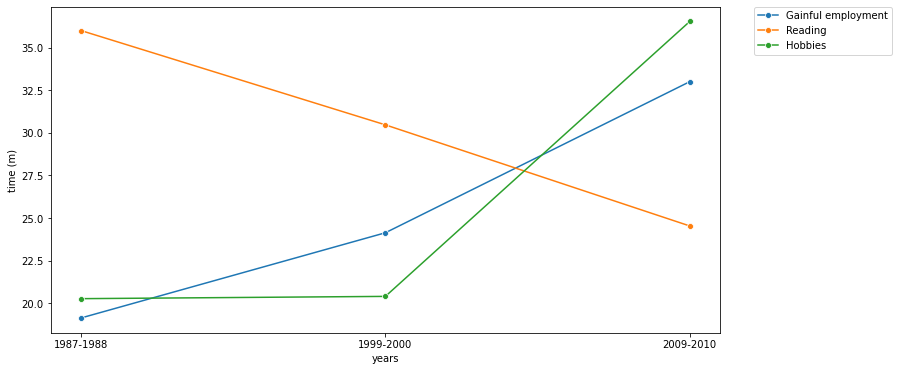

In [174]:
activities = ['Gainful employment', 'Travel to and from work', 'Housekeeping', 'Maintenance work', 
 'Other domestic work', 'Childcare', 'Shopping and services', 
 'Travel related to domestic work', 'Sleep', 'Meals', 'Washing and dressing', 
 'School or university', 'Travel related to study', 'Free time study (incl. related travel)', 
 'Participatory activity', 'Sports and outdoor activities', 'Entertainment and culture', 
 'Reading', 'Listening to radio', 'Watching television', 'Socialising with family', 
 'Socialising with friends', 'Hobbies', 'Other free time', 'Travel related to free time']

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# for act in ("Reading", "Watching television", ):
# Create a line for the cheese consumption

for act in activities:
    
    mean_2010s = df[df["years"] == "2009-2010"][act].mean()
    mean_80s = df[df["years"] == "1987-1988"][act].mean()
    print(f"{act.ljust(40)} mean 80: {mean_80s:.2f} mean2010s: {mean_2010s:.2f}")
    if  np.abs(mean_2010s -  mean_80s) > 10:
        sns.lineplot(x="years", y=act, data=df, marker="o", ax=ax, label=act)

# Make the legend 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.set_ylabel("time (m)")

plt.show()

In [ ]:
activities = ['Gainful employment', 'Travel to and from work', 'Housekeeping', 'Maintenance work', 
 'Other domestic work', 'Childcare', 'Shopping and services', 
 'Travel related to domestic work', 'Sleep', 'Meals', 'Washing and dressing', 
 'School or university', 'Travel related to study', 'Free time study (incl. related travel)', 
 'Participatory activity', 'Sports and outdoor activities', 'Entertainment and culture', 
 'Reading', 'Listening to radio', 'Watching television', 'Socialising with family', 
 'Socialising with friends', 'Hobbies', 'Other free time', 'Travel related to free time']

# for act in ("Reading", "Watching television", ):
# Create a line for the cheese consumption

act_to_plot = [act for act in activities if "Travel" in act]

# Create the figure and axis
fig, axes = plt.subplots(figsize=(12, 6), ncols=len(act_to_plot))

for i, act in enumerate(act_to_plot):

    sns.barplot(x="gender", y=act, data=df, ax=axes[i])
    axes[i].set_title(act)

ax.set_ylabel("time (m)")

plt.tight_layout()
plt.show()